### Necessary Imports

In [30]:
# Import pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [31]:
# Read the dataset

df = pd.read_excel("Dataset_Kmean.xlsx")

df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Gender,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


### Visualize Datapoints in Data

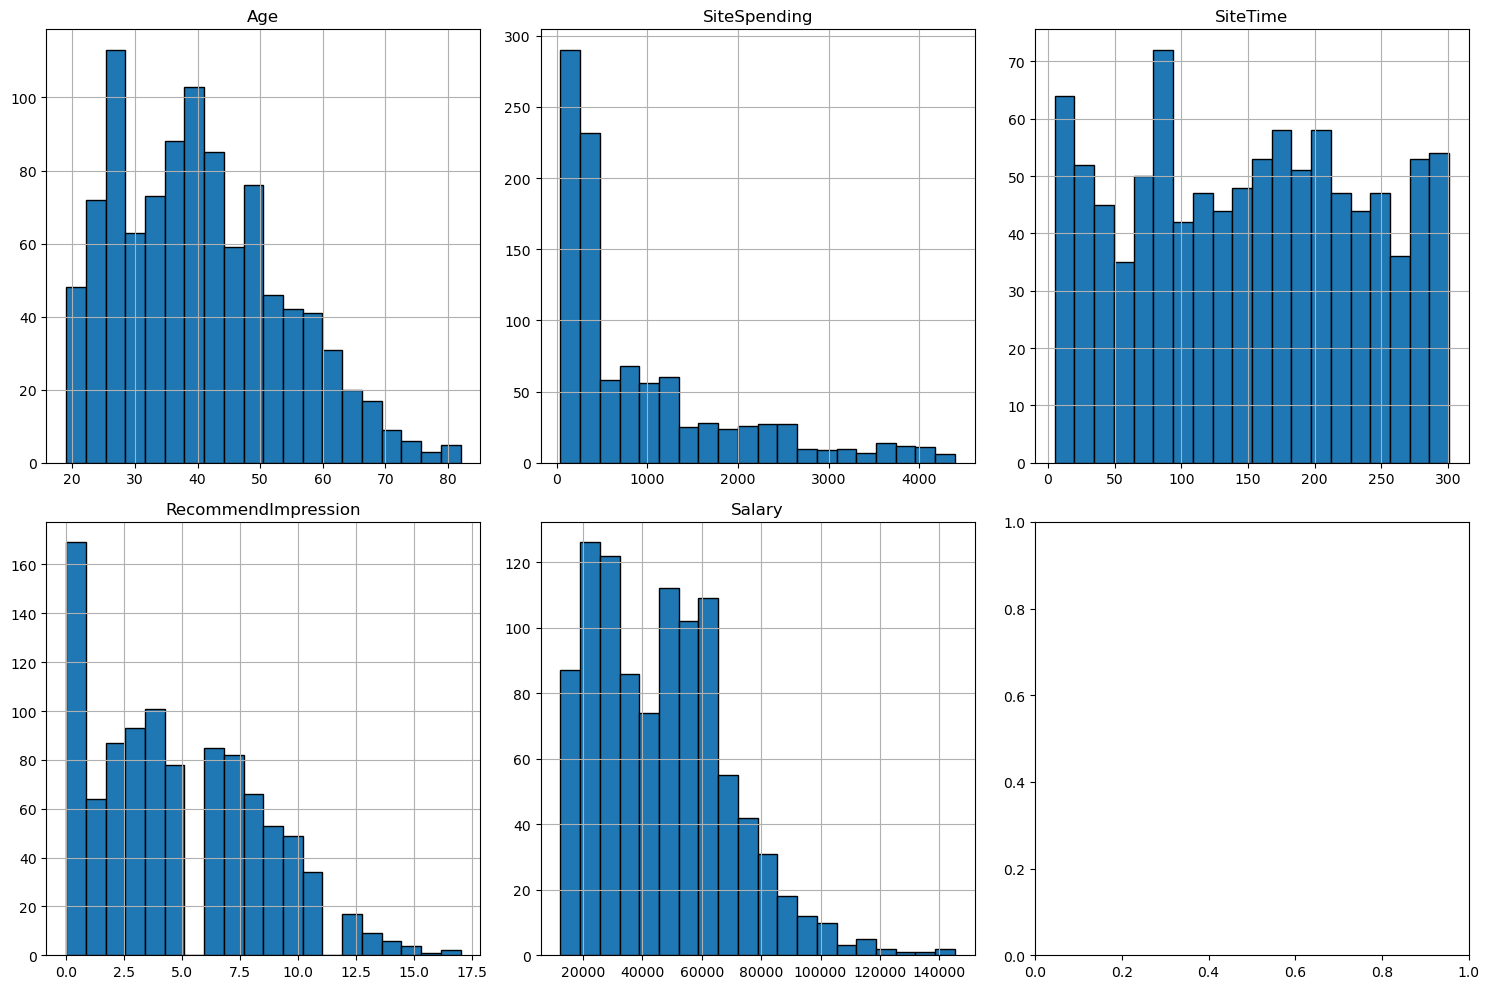

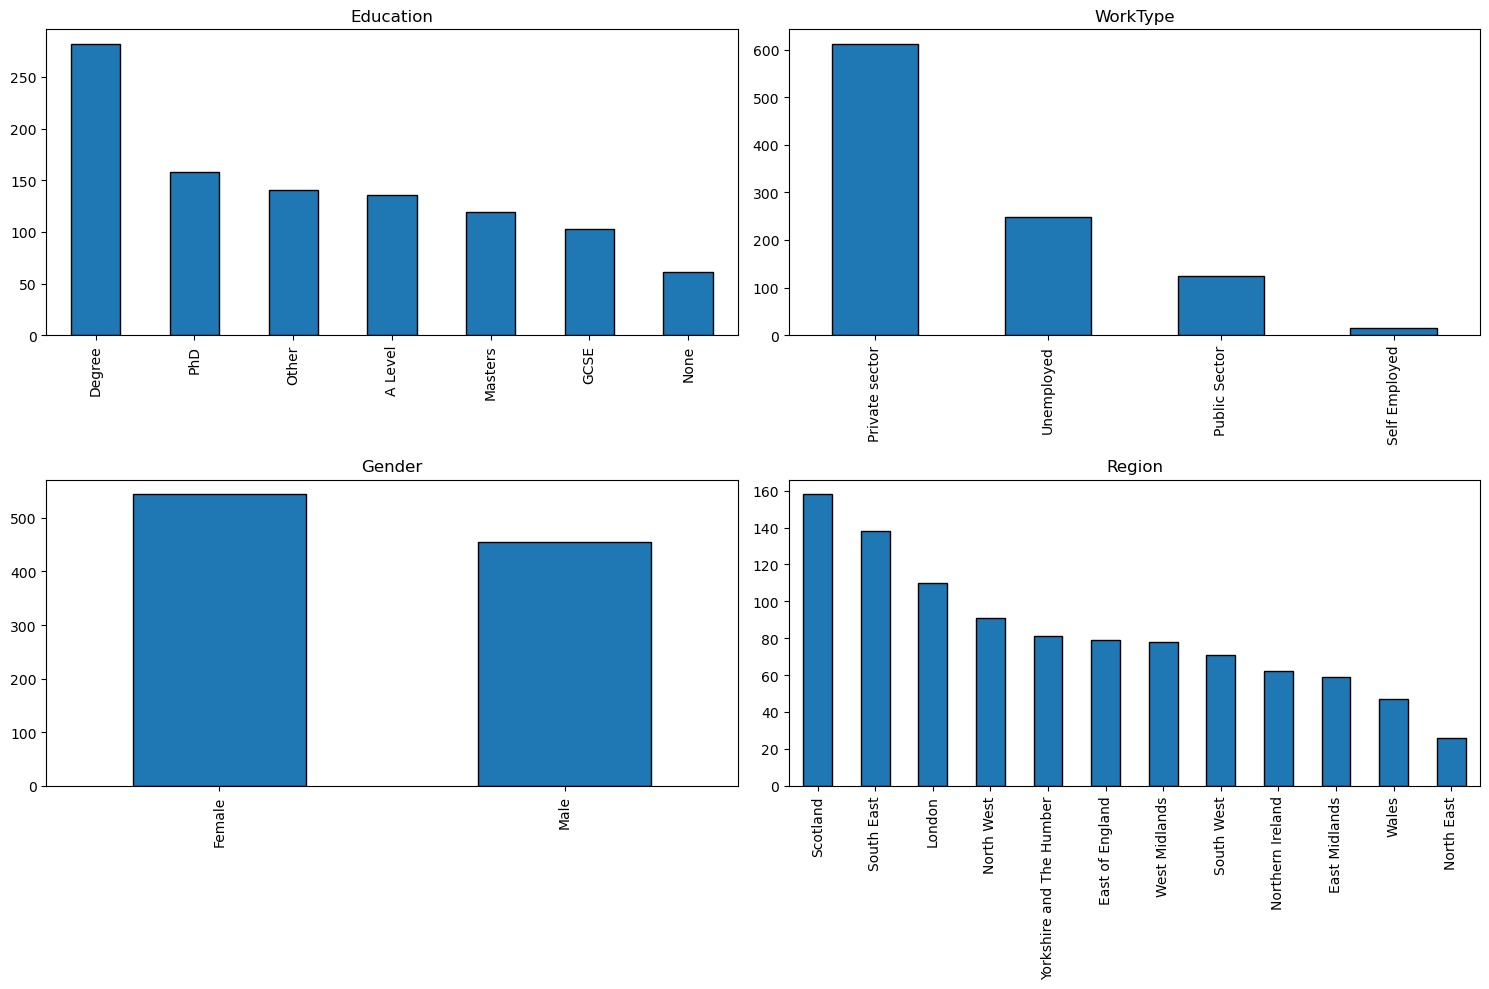

In [32]:
# Plot the dataset

import matplotlib.pyplot as plt
import pandas as pd


numeric_cols = ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Salary']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    ax = axes[i//3, i%3]
    df[col].hist(ax=ax, bins=20, edgecolor='k')
    ax.set_title(col)

plt.tight_layout()
plt.show()


categorical_cols = ['Education', 'WorkType', 'Gender', 'Region']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    ax = axes[i//2, i%2]
    df[col].value_counts().plot(kind='bar', ax=ax, edgecolor='k')
    ax.set_title(col)

plt.tight_layout()
plt.show()



### From Scratch

In [33]:

features = df[['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Salary']]

def initialize_centroids(data, k):
    indices = np.random.choice(data.index, k, replace=False)
    return data.loc[indices].copy()

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def assign_clusters(data, centroids):
    cluster_assignments = []
    for _, point in data.iterrows():
        distances = [euclidean_distance(point.values, centroid.values) for _, centroid in centroids.iterrows()]
        cluster_idx = np.argmin(distances)
        cluster_assignments.append(cluster_idx)
    return cluster_assignments

def recalculate_centroids(data, cluster_assignments, k):
    new_centroids_list = []

    for cluster_idx in range(k):
        cluster_points = data[cluster_assignments == cluster_idx]
        
        new_centroid = cluster_points.mean()
        
        new_centroids_list.append(new_centroid)
    
    new_centroids = pd.concat(new_centroids_list, axis=1).T
    return new_centroids

def k_means_clustering(data, k, max_iterations=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        cluster_assignments = assign_clusters(data, centroids)
        cluster_assignments = pd.Series(cluster_assignments, index=data.index)

        new_centroids = recalculate_centroids(data, cluster_assignments, k)
        
        centroid_shifts = [euclidean_distance(old, new) for old, new in zip(centroids.values, new_centroids.values)]
        
        if all(shift <= tol for shift in centroid_shifts):
            break
        
        centroids = new_centroids
    
    return cluster_assignments, centroids

k = 10
cluster_assignments, centroids = k_means_clustering(features, k)

clustered_data = df.copy()
clustered_data['Cluster'] = cluster_assignments

clustered_data.head()

# print("\nCentroids:")
# print(centroids)

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Gender,Region,Salary,Cluster
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49,7
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45,0
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41,4
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99,5
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23,8


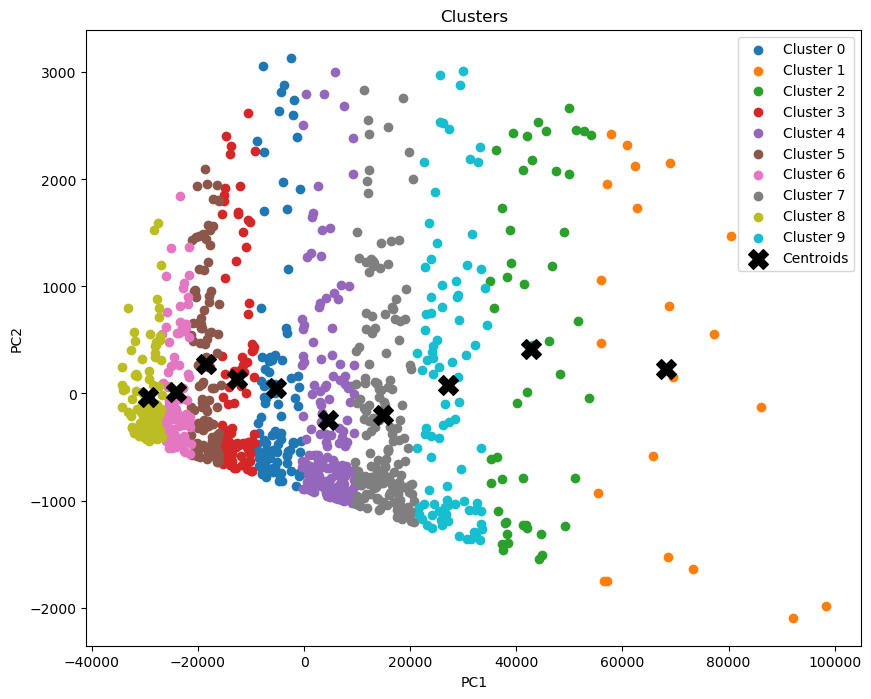

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

reduced_df['Cluster'] = cluster_assignments

plt.figure(figsize=(10, 8))
for cluster_idx in range(k):
    cluster_points = reduced_df[reduced_df['Cluster'] == cluster_idx]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster_idx}')

reduced_centroids = pca.transform(centroids)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### With Libraries

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
# Read the dataset

df = pd.read_excel("Dataset_Kmean.xlsx")

df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Gender,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


In [37]:
features = df[["Age", "SiteSpending", "SiteTime", "RecommendImpression", "Salary"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_

df.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Gender,Region,Salary,Cluster
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49,3
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45,5
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41,3
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99,1
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23,8


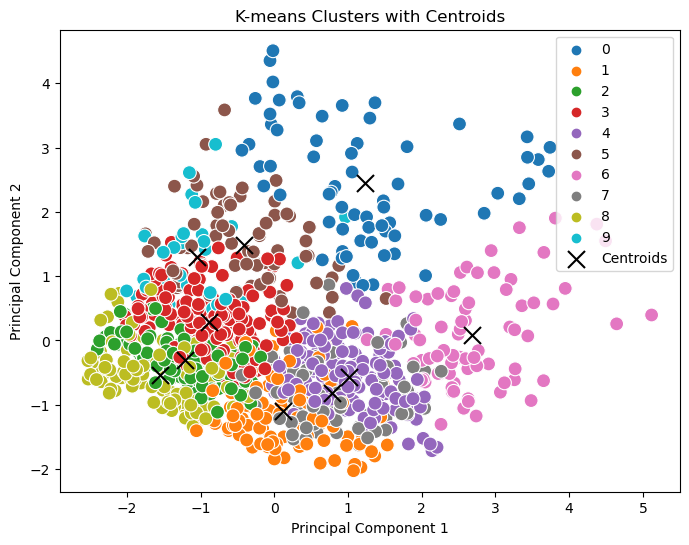

In [38]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

visualization_df = pd.DataFrame({
    "PC1": reduced_features[:, 0],
    "PC2": reduced_features[:, 1],
    "Cluster": df['Cluster']
})

centroids = kmeans.cluster_centers_
reduced_centroids = pca.transform(centroids)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=visualization_df, palette="tab10", s=100, edgecolor="w")
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], color='k', s=150, marker='x', label='Centroids')
plt.title("K-means Clusters with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()